# Importing libraries

In [38]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np
import os 
import re

In [ ]:
# reading and processing data 
import cv2
import urllib 
import itertools 
import seaborn as sns 
import os, random, glob
import matplotlib.pyplot as plt
from imutils import paths
from sklearn.utils import shuffle
from urllib.request import urlopen 

# ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

# model evaluation 
from sklearn.metrics import confusion_matrix, classification_report 

# modeling 

import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.regularizers import l2

# Data

## Load data

In [35]:
from PIL import Image
from PIL.TiffTags import TAGS

# Load the re-uploaded TIFF file
tiff_path = "../../Datasets/OCR/set_a/tif/ae07_045.tif"
with Image.open(tiff_path) as img:
    # Extract TIFF metadata
    tiff_metadata = {TAGS[key]: img.tag[key] for key in img.tag_v2}

# Retrieve the ImageDescription tag if available
image_description = tiff_metadata.get("ImageDescription", ["Not found"])[0]
image_description


'ZIP:3097;AW1:ÑÈÇíÚ.ÓíÏí.ÙÇåÑ;AW2:raA|baB|aaE|yaB|ayE|seB|yaM|daE|yaA|zaB|aaE|heB|raE|;QUA:YB1;ADD:P7'

In [36]:
import re

text = image_description
match = re.search(r'AW1:([^;]+)', text)

# Extract corrupted text
corrupt_text = match.group(1) if match else None

corrupt_text


'ÑÈÇíÚ.ÓíÏí.ÙÇåÑ'

In [37]:
# The incorrectly encoded text
corrupt_text

# Try decoding with different encodings
encodings = ["windows-1256", "iso-8859-6", "utf-8"]

# Attempt to decode the text using different encodings
decoded_texts = {}
try:
    decoded_texts = corrupt_text.encode("latin1").decode(encodings[0])
except UnicodeDecodeError:
    decoded_texts[enc] = "Decoding failed"

decoded_texts


'ربايع.سيدي.ظاهر'

In [11]:
from PIL import Image

# Path to the TIFF file
tiff_path = "../../Datasets/OCR/set_a/tif/ae07_001.tif"  # Replace with your actual file path

# Open the TIFF file
with Image.open(tiff_path) as img:
    for i in range(img.n_frames):  # Iterate through frames (pages) if multi-page
        img.seek(i)  # Move to frame i
        extracted_image = img.copy()  # Copy the image to work with it in memory

        # Now you can process the image without saving it
        extracted_image.show()  # Displays the image
#image_array = np.array(extracted_image)

In [48]:
def getLabel(path):
    # Open and read the file
    with open(path, "r") as file:
        data = file.read()  # Read the entire content of the file

    # Regular expression to extract AW2
    match = re.search(r'AW2:([^;]+)', data)

    # Extract and print AW2 value
    if match:
        aw2_value = match.group(1).strip()
        return aw2_value
    else:
        return


In [ ]:
def load_dataset(imagePath, labelPath):
    x = []
    labels = []
    # It lists and sorts the images in the specified path
    image_paths = sorted(list(paths.list_images(imagePath)))
    label_paths = sorted(list(paths.list_images(labelPath)))
    for imagePath, labelPaths in zip(image_paths,label_paths):
        # The images in the specified path are read using the OpenCV library
        img = cv2.imread(image_path)
        # resize the read image 
        img = cv2.resize(img, (32,128))
        # the resized images are added to the x list
        x.append(img)
         # When each path is split by '/', the second-to-last element of the resulting list represents the label
        label = getLabel(labelPaths)
        
        # The label is created by retrieving the corresponding value for the given key from the `waste_labels`

        # dictionary, which contains the numerical representations of the captured labels
        labels.append(label)
        # the dataset is shuffled randomly
    print(f'X size : {np.array(x).shape}')
    print(f'Number of label classes {np.unique(labels)}, Number of observation in the dataset : {len(labels)}')
    
    return np.array(x), np.array(labels) 


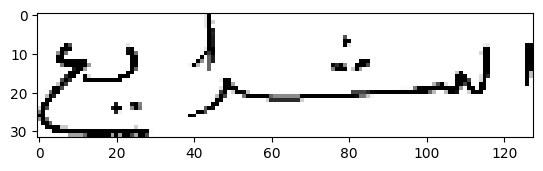

In [41]:
img = cv2.imread('../../Datasets/OCR/set_a/bmp/ae07_001.bmp')
# resize the read image 
img = cv2.resize(img, (128, 32))
plt.imshow(img, cmap='gray')


In [49]:
getLabel('../../Datasets/OCR/set_a/tru/ae07_001.tru')

'aaA|laB|shM|raE|aaA|yaB|ayE|'

##  Data visualization

# Modeling 